In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
data_train = pd.read_csv('train.csv')

In [62]:
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0]/mapdata.shape[1]

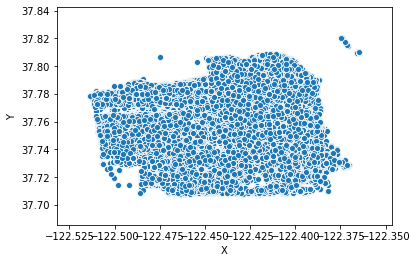

In [10]:
sns.scatterplot(data_train[data_train.X<-121].X, data_train[data_train.Y<60].Y)

In [24]:
data_train['X1'] = data_train[data_train.X<-121].X
data_train['Y1'] = data_train[data_train.Y<60].Y
data_train.dropna()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,X1,Y1
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,-122.419088,37.807802


In [34]:
np.min(data_train.X), np.max(data_train.X), np.min(data_train.Y), np.max(data_train.Y)
#lon_lat_box = (-122.61364206429, -122.26493749408001, 37.70, 37.83)
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)

In [27]:
data_train=data_train.dropna()
data_train['X1'].isna().sum()

0

In [72]:
train_subset = data_train[1:300000]
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

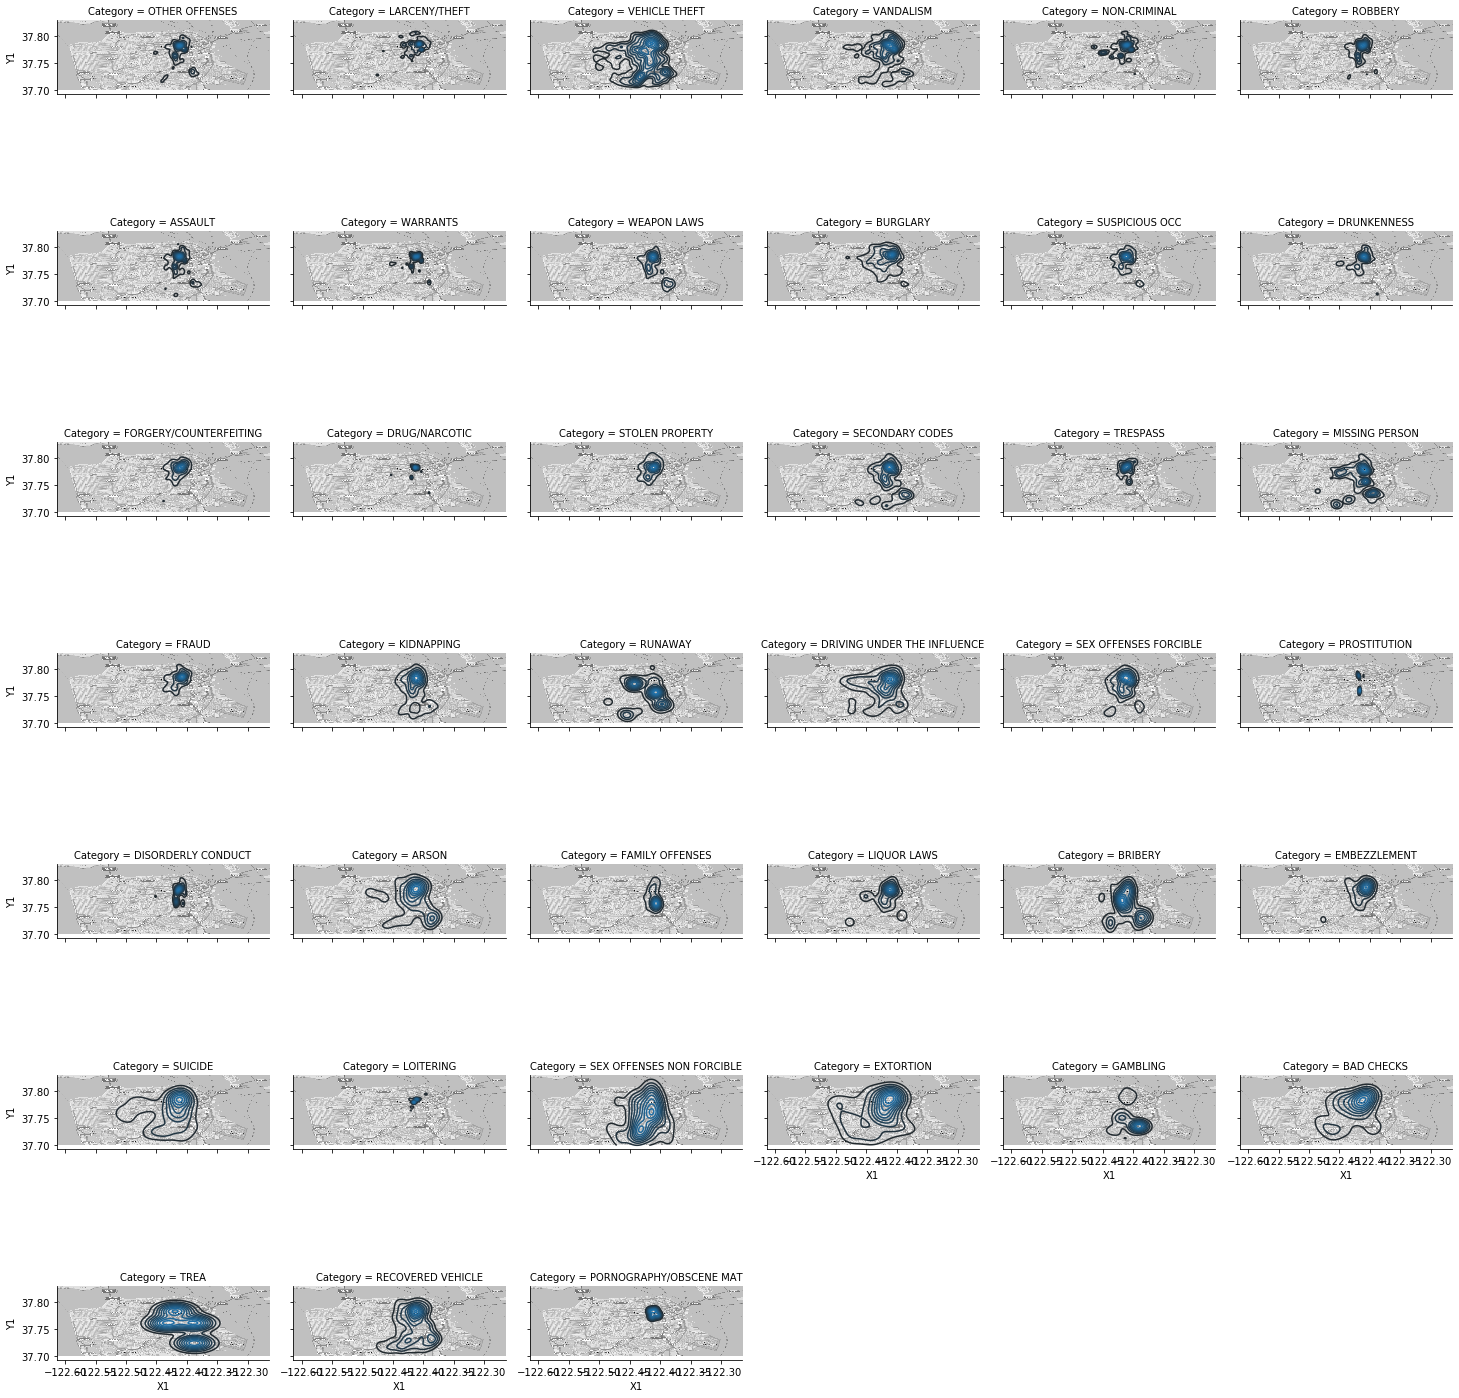

In [73]:
g = sns.FacetGrid(train_subset[['X1','Y1','Category']], col='Category', col_wrap=6, aspect=1/asp)
for ax in g.axes:
    ax.imshow(np.array(mapdata), extent=lon_lat_box, aspect=asp, cmap=plt.get_cmap('gray'))
    
g.map(sns.kdeplot, 'X1','Y1',clip=clipsize)